In [312]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import os
import warnings

In [354]:
df = pd.read_csv('drive/MyDrive/AI_2_ergasia1/imdb-reviews.csv','\t')
test_df = None #put test set path here

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [314]:
df.head()

,url,rating,review
0,http://www.imdb.com/title/tt0120623/usercomments,10.0,I thought this was a quiet good movie. It was ...
1,http://www.imdb.com/title/tt0043117/usercomments,9.0,Wagon Master is a very unique film amongst Joh...
2,http://www.imdb.com/title/tt0043117/usercomments,10.0,This film has to be as near to perfect a film ...
3,http://www.imdb.com/title/tt0835204/usercomments,4.0,I gave this 4 stars because it has a lot of in...
4,http://www.imdb.com/title/tt0499603/usercomments,10.0,This movie is really genuine and random. It's ...


# **Text preprocessing**

In [355]:
#Tokenization of text
tokenizer=ToktokTokenizer()
nltk.download('stopwords')
stopword_list=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [356]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [357]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

In [358]:
#set stopwords to english
stop=set(stopwords.words('english'))

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [319]:
df['review']=df['review'].apply(remove_special_characters)
df['review']=df['review'].apply(simple_stemmer)
df['review']=df['review'].apply(remove_stopwords)

if test_df is not None:
  test_df['review']=test_df['review'].apply(remove_special_characters)
  test_df['review']=test_df['review'].apply(simple_stemmer)
  test_df['review']=test_df['review'].apply(remove_stopwords)


# **Data Preprocessing**

In [359]:
X = df.drop('rating', axis=1)
Y = pd.DataFrame(columns=['rating'])
Y['rating'] = df['rating']

#classify movie reviews as negative or positive
Y.loc[Y['rating'] <= 4.0, 'rating'] = 0
Y.loc[Y['rating'] >= 7.0, 'rating'] = 1

if test_df is not None:
  X_test = test_df.drop('rating', axis=1)
  Y_test = test_df[['rating']]

  Y_test.loc[Y_test['rating'] <= 4, 'rating'] = 0
  Y_test.loc[Y_test['rating'] >= 7, 'rating'] = 1

  X_val = X_test
  Y_val = Y_test

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [360]:
#split data to train set and validation set
if test_df is None:
  X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)
else:
  X_train = X
  Y_train = Y

# **Vectorizing (using CountVectorizer)**

In [322]:
# corpus_train = X_train['review'].tolist()
# vectorizer = CountVectorizer(max_features=1200, ngram_range=(1,5))
# vectorized_reviews_x_train = vectorizer.fit_transform(corpus_train)
# corpus_val = X_val['review'].tolist()
# vectorized_reviews_x_val = vectorizer.transform(corpus_val)

# **Vectorizing (using tfidfVectorizer)**

In [351]:
corpus_train = X_train['review'].tolist()

vectorizer = TfidfVectorizer(max_features=5000, 
ngram_range=(1,3), 
strip_accents=None,
lowercase=True,
use_idf=True,
norm='l2',
smooth_idf=True)

vectorized_reviews_x_train = vectorizer.fit_transform(corpus_train)
corpus_val = X_val['review'].tolist()
vectorized_reviews_x_val = vectorizer.transform(corpus_val)

# **Printing data**

In [329]:
print(X_train.shape," X_train")
print(X_val.shape," X_val")
print(vectorized_reviews_x_train.get_shape()," vectorized X_train")
print(vectorized_reviews_x_val.get_shape()," vectorized X_val")
print(Y_train.shape," Y_train")
print(Y_val.shape," Y_val")

(36006, 2)  X_train
(9002, 2)  X_val
(36006, 5000)  vectorized X_train
(9002, 5000)  vectorized X_val
(36006, 1)  Y_train
(9002, 1)  Y_val


In [325]:
Y_val

,rating
29401,1.0
1651,0.0
1562,1.0
40882,0.0
19080,1.0
...,...
30481,1.0
35100,1.0
24352,1.0
40017,1.0


# **Time for Training/Prediction**

In [352]:
classifier = LogisticRegression(max_iter=2000)
classifier.fit(vectorized_reviews_x_train, np.ravel(Y_train))
print(np.ravel(Y_train))

[1. 0. 0. ... 1. 0. 1.]


F1 Score Train: 1.0
F1 Score Validation: 0.7953472914589566
F1 Score Train: 0.9472463768115942
F1 Score Validation: 0.8603801169590644
F1 Score Train: 0.932487539646579
F1 Score Validation: 0.8731963270660255
F1 Score Train: 0.928919577579204
F1 Score Validation: 0.8781448260774447
F1 Score Train: 0.9231598398521713
F1 Score Validation: 0.8801517251440659
F1 Score Train: 0.9250107831659374
F1 Score Validation: 0.8848989124881396
F1 Score Train: 0.9197185268889003
F1 Score Validation: 0.8840399912427934
F1 Score Train: 0.9195361600424891
F1 Score Validation: 0.886891714160456
F1 Score Train: 0.9186572989851679
F1 Score Validation: 0.8869539767322748
F1 Score Train: 0.9190066659758919
F1 Score Validation: 0.8897505303972492


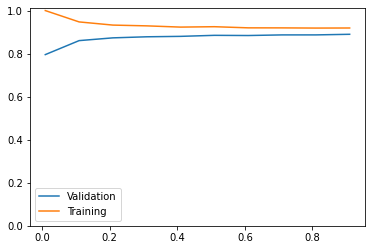

In [353]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

list_f1=[]
list_f1_train=[]
list_sample_size=[]

for times in range(10):
  # training
  #
  X, X_unused, y, y_unused = train_test_split(vectorized_reviews_x_train, Y_train, test_size = 1 - (times * 0.1 + 0.01))

  classifier = LogisticRegression(max_iter=2000)
  classifier.fit(X, np.ravel(y))

  results_train = classifier.predict(X)

  # validation
  # 
  results = classifier.predict(vectorized_reviews_x_val)

  # score
  #
  f1_train = f1_score(y, results_train)#Setting Up Libraries
#Importing necessary libraries. We’ll be using a number of Python tools and frameworks dedicated to text analytics, natural language processing, and machine learning.
  print("F1 Score Train: " + str(f1_train))

  f1 = f1_score(Y_val, results)
  print("F1 Score Validation: " + str(f1))

  list_f1.append(f1)
  list_f1_train.append(f1_train)
  list_sample_size.append((times * 0.1 + 0.01))

#print(plot_data)
plt.plot(list_sample_size, list_f1)
plt.plot(list_sample_size, list_f1_train)

plt.ylim(ymin=0)
plt.legend(["Validation", "Training"])